# Name: Aniruddh Kulkarni                                                                                         

# Roll no: I081   

# Stream: CS (AI)   

# Division: I                         

# Semester: 5th Semester  

# Batch: I-3            

# Subject: NLP

# Assignment-4

In [4]:
!pip install nltk
%pip install textblob

import nltk

import pandas as pd
import numpy as np
from collections import Counter
import re,string

from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


%pip install wordcloud
from wordcloud import WordCloud
from textwrap import wrap

%pip install textstat
import textstat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached textstat-0.7.3-py3-none-any.whl (105 kB)
  Using cached pyphen-0.14.0-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import spacy
%pip install scattertext
import scattertext as st

  Using cached scattertext-0.1.19-py3-none-any.whl (8.2 MB)
  Using cached statsmodels-0.14.0-cp310-cp310-macosx_11_0_arm64.whl (9.4 MB)
  Using cached flashtext-2.7-py2.py3-none-any.whl
  Using cached gensim-4.3.1-cp310-cp310-macosx_11_0_arm64.whl (24.0 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


# About Dataset: 
This contains data of news headlines published over a period of nineteen years.

Sourced from the reputable Australian news source ABC (Australian Broadcasting Corporation)

In [6]:
import pandas as pd
df = pd.read_csv('abcnews-date-text.csv',nrows=10000)
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


<Axes: >

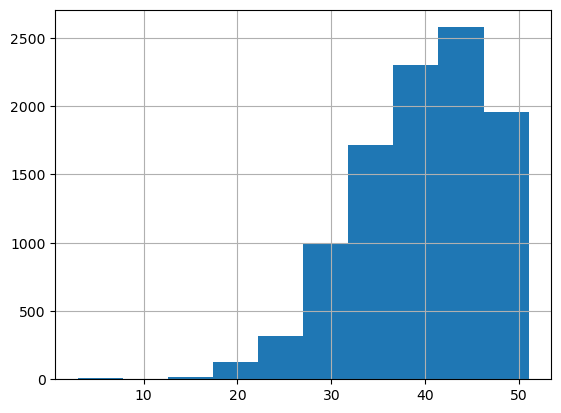

In [7]:
df['headline_text'].str.len().hist()

<Axes: >

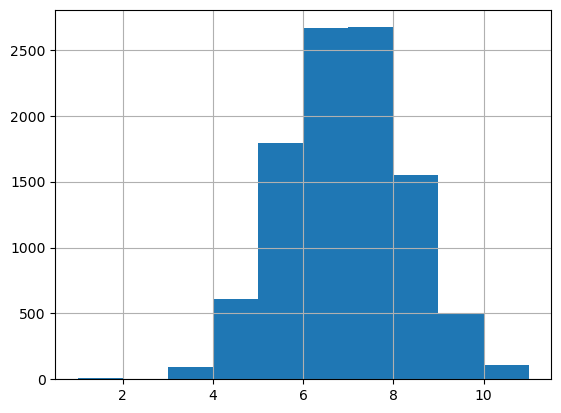

In [8]:
df['headline_text'].str.split().map(lambda x: len(x)).hist()

<Axes: >

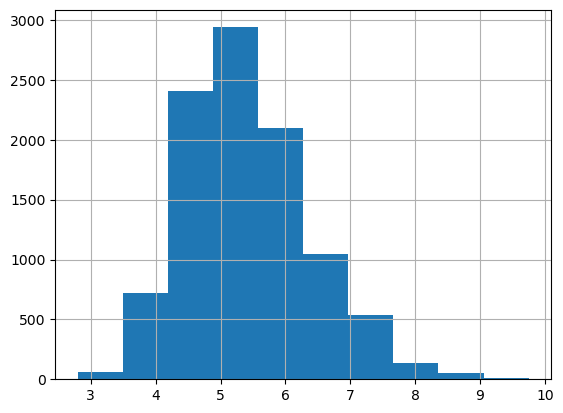

In [10]:
#average word length in each sentence
import numpy as np
df['headline_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pushpakulkarni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#Creating Corpus
corpus=[]
new= df['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

corpus        

['aba',
 'decides',
 'against',
 'community',
 'broadcasting',
 'licence',
 'act',
 'fire',
 'witnesses',
 'must',
 'be',
 'aware',
 'of',
 'defamation',
 'a',
 'g',
 'calls',
 'for',
 'infrastructure',
 'protection',
 'summit',
 'air',
 'nz',
 'staff',
 'in',
 'aust',
 'strike',
 'for',
 'pay',
 'rise',
 'air',
 'nz',
 'strike',
 'to',
 'affect',
 'australian',
 'travellers',
 'ambitious',
 'olsson',
 'wins',
 'triple',
 'jump',
 'antic',
 'delighted',
 'with',
 'record',
 'breaking',
 'barca',
 'aussie',
 'qualifier',
 'stosur',
 'wastes',
 'four',
 'memphis',
 'match',
 'aust',
 'addresses',
 'un',
 'security',
 'council',
 'over',
 'iraq',
 'australia',
 'is',
 'locked',
 'into',
 'war',
 'timetable',
 'opp',
 'australia',
 'to',
 'contribute',
 '10',
 'million',
 'in',
 'aid',
 'to',
 'iraq',
 'barca',
 'take',
 'record',
 'as',
 'robson',
 'celebrates',
 'birthday',
 'in',
 'bathhouse',
 'plans',
 'move',
 'ahead',
 'big',
 'hopes',
 'for',
 'launceston',
 'cycling',
 'championsh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<Axes: >

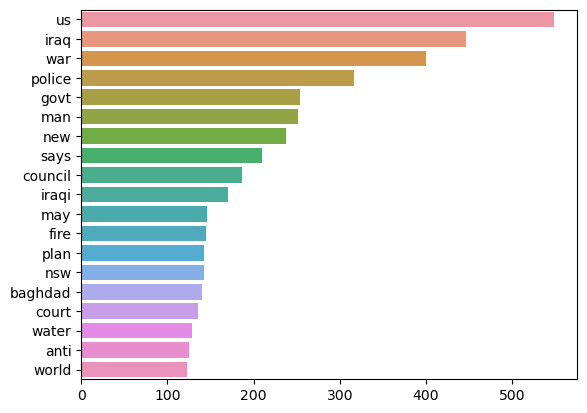

In [17]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
%pip install seaborn
import seaborn as sns        
sns.barplot(x=y,y=x)

# Here ‘us’ could mean either the USA or us (you and me). us is not a stopword, but when we observe other words in the graph they are all related to the US – Iraq war and “us” here probably indicate the USA.

In [18]:
#NGRAM EXPLORATION
from nltk.util import ngrams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

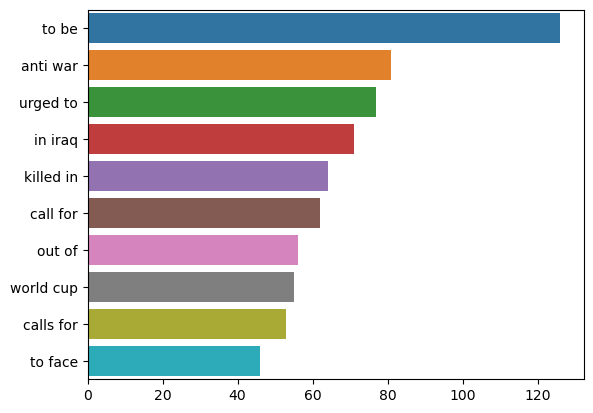

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
top_bi_grams=get_top_ngram(df['headline_text'],n=2)
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x)

<Axes: >

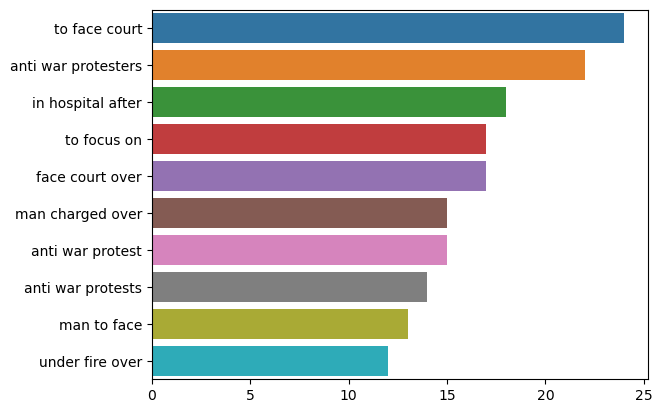

In [21]:
top_tri_grams=get_top_ngram(df['headline_text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

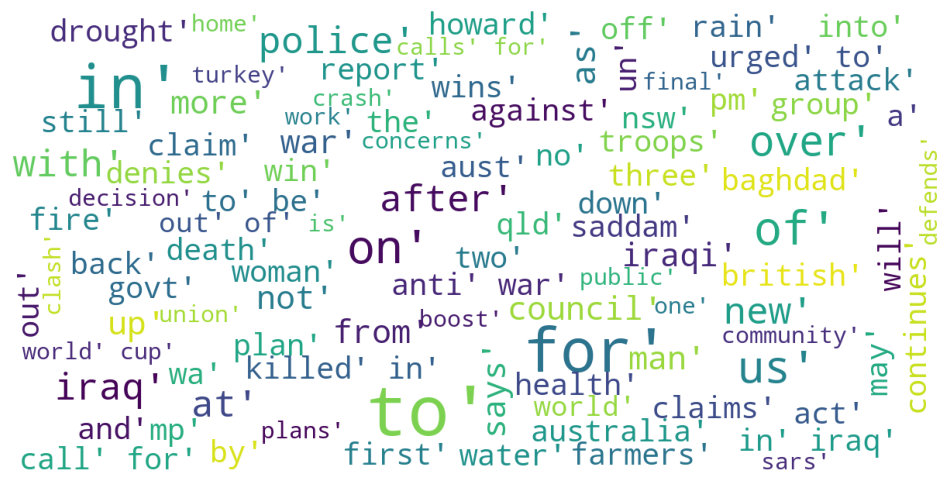

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [26]:
#Textblob 
%pip install textblob
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment #returns polarity[-1,1] & subjectivity [0,1]

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


Sentiment(polarity=-0.2, subjectivity=0.0)

<Axes: >

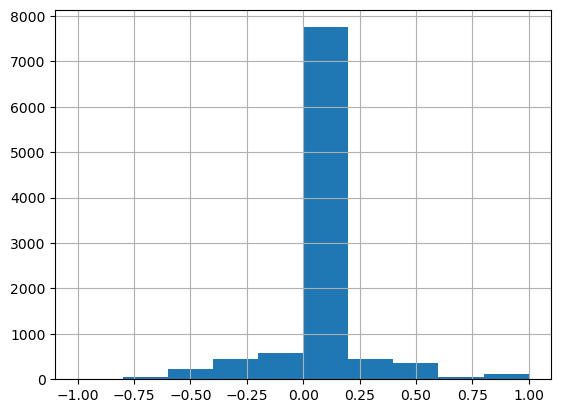

In [27]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']=df['headline_text'].\
   apply(lambda x : polarity(x))
df['polarity_score'].hist()

# We can see that the polarity mainly ranges between 0.00 and 0.20. This indicates that the majority of the news headlines are neutral.

<BarContainer object of 3 artists>

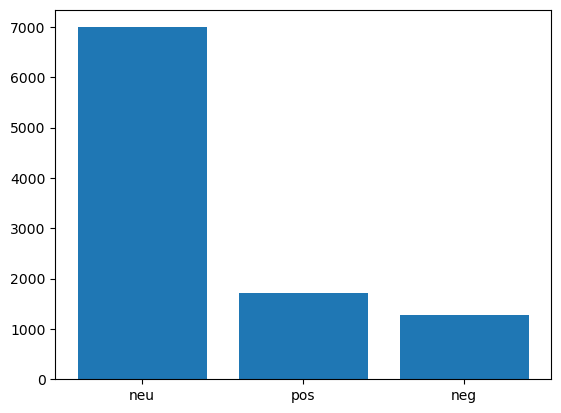

In [28]:
# classifying the news as negative, positive and neutral based on the scores.
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df['polarity']=df['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

In [29]:
df[df['polarity']=='pos']['headline_text'].head()

1     act fire witnesses must be aware of defamation
5                  ambitious olsson wins triple jump
6         antic delighted with record breaking barca
18        bryant leads lakers to double overtime win
26      commonwealth bank cuts fixed home loan rates
Name: headline_text, dtype: object

In [30]:
df[df['polarity']=='neg']['headline_text'].head()

7     aussie qualifier stosur wastes four memphis match
23               carews freak goal leaves roma in ruins
28     council chief executive fails to secure position
34                   dargo fire threat expected to rise
40        direct anger at govt not soldiers crean urges
Name: headline_text, dtype: object

# Vader sentiment analysis
VADER or Valence Aware Dictionary and Sentiment Reasoner is a rule/lexicon-based, open-source sentiment analyzer pre-built library, VADER sentiment analysis class returns a dictionary that contains the probabilities of the text for being positive, negative and neutral. Then we can filter and choose the sentiment with most probability.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pushpakulkarni/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<BarContainer object of 3 artists>

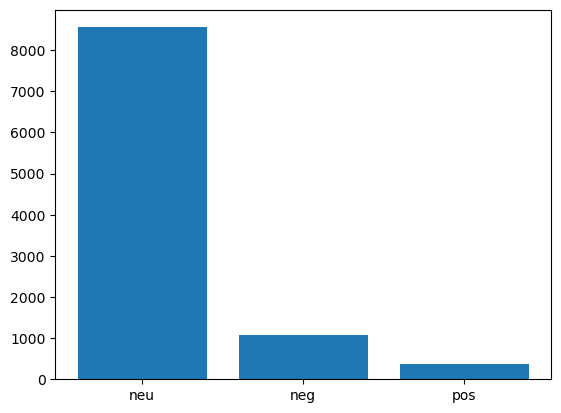

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

df['polarity']=df['headline_text'].\
    map(lambda x: get_vader_score(x))
polarity=df['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

# Named Entity Recognition
Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc. By using NER we can get great insights about the types of entities present in the given text dataset.

In [32]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [33]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df['headline_text'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

<Axes: >

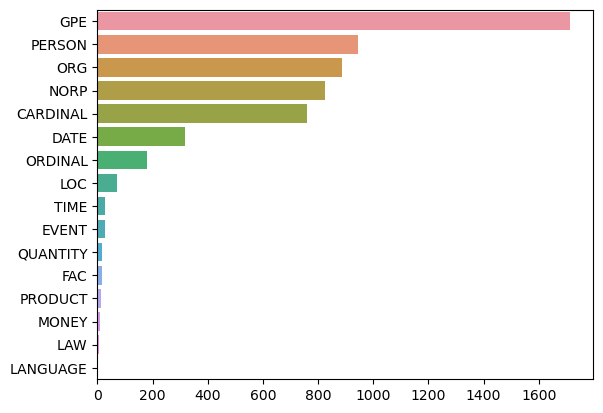

In [34]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

<Axes: >

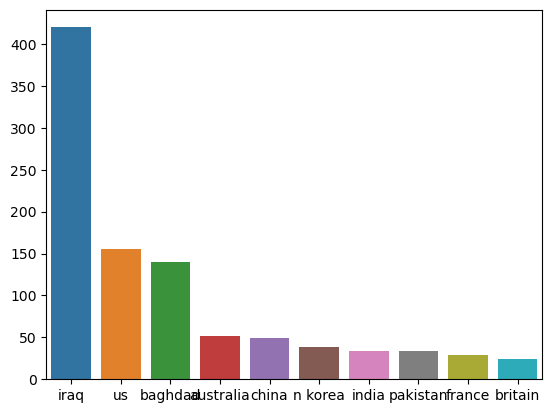

In [36]:
#visualizing the most common tokens per entity.
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=df['headline_text'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y = y,x = x)

<Axes: >

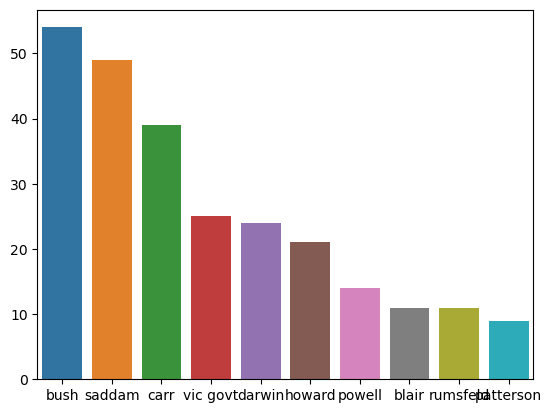

In [38]:
per=df['headline_text'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y = y,x = x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pushpakulkarni/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<Axes: >

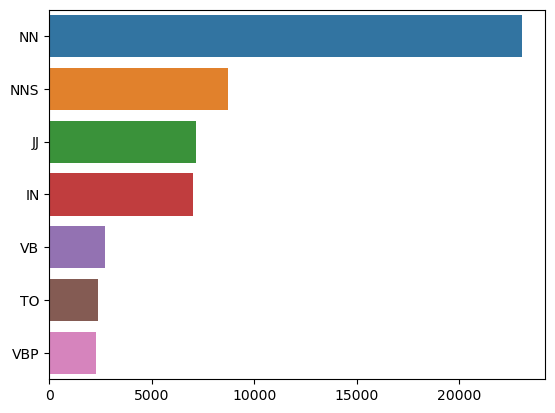

In [39]:
#POS TAGGING
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.tokenize import word_tokenize
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=df['headline_text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

<Axes: >

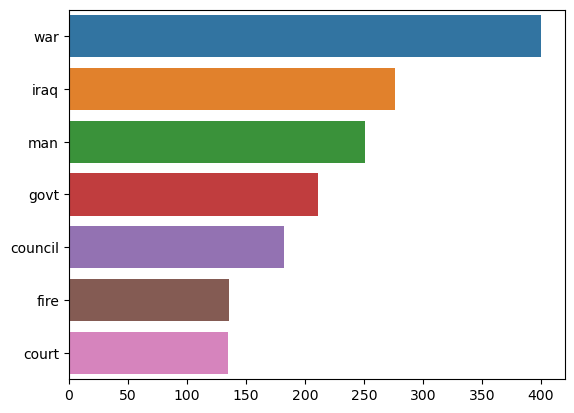

In [40]:
#which singular noun occur most commonly in news headlines.
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj


words=df['headline_text'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

# Exploring through text complexity
It can be very informative to know how readable (difficult to read) the text is and what type of reader can fully understand it. Do we need a college degree to understand the message or a first-grader can clearly see what the point is?

There are many readability score formulas available for the English language like: 

ARI = 4.71 * (characters/words) +
0.5 * (words/sentence) -21.43

FRE = 206.835 − 1.015 * (total words/total sentences)
− 84.6 * (total syllables/ total words)


FKGL = 0.39 * (total words/ totalsentences)
+ 11.8 (total syllables/total words) -15.59

GFI = 0.4 * (( words/ sentence) +
100 * (complex words/ words))

  Using cached textstat-0.7.3-py3-none-any.whl (105 kB)
  Using cached pyphen-0.14.0-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


<Axes: >

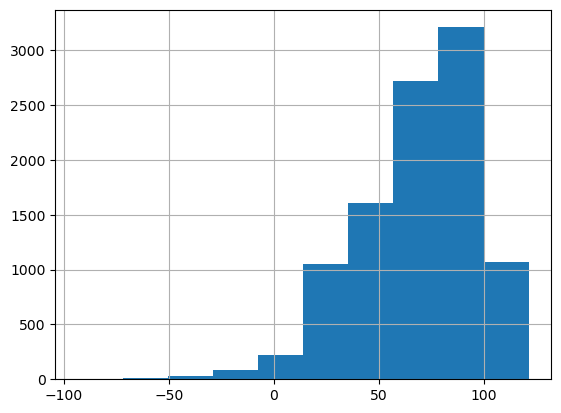

In [42]:
%pip install textstat
from textstat import flesch_reading_ease

df['headline_text'].\
   apply(lambda xi : flesch_reading_ease(xi)).hist()

In [43]:
li=[]
li=(df['headline_text'].apply(lambda xi : flesch_reading_ease(xi)))

# Almost all of the readability scores fall above 60. This means that an average 11-year-old student can read and understand the news headlines. Let’s check all news headlines that have a readability score below 5.

In [44]:
x=[i for i in range(len(li)) if li[i]<5]
df.iloc[x]['headline_text'].head()

134    policewomen accusations feature at federal crime
150      report highlights container terminal potential
285       groups praise outgoing opposition agriculture
298            investigations underway into qantas skid
308      landholder contribution still under discussion
Name: headline_text, dtype: object

# Conclusion:
1) EDA (Exploratory Data Analysis) is an important step to understand the data and its characteristics so that proper pre-processing can be done before making the model.         
2) We can see that even though negative news is less, but its affect is more than the neutral and positive ones.